#bot detection

#data preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##sample dataset of size 36590




In [2]:
import numpy as np
import pandas as pd
user = pd.read_csv("/content/drive/MyDrive/bds/step1.csv", sep=',', lineterminator='\n')

user.head()

,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",NaN,False,1698,4,53,2016-10-15 21:32:11,4,False,False,13097,NaN,False,False,False
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,https://t.co/DJ4TYZgm7Q,False,823,852,5,2016-11-09 05:01:30,516,False,False,251,NaN,False,False,False
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",https://t.co/jIrurMaqEX,False,193,805,2,2017-06-17 05:34:27,4105,True,False,1201,NaN,False,False,False
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,NaN,False,569,659,2,2016-07-21 13:32:25,10086,True,False,1648,NaN,True,True,False
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",NaN,False,748235,118,1818,2012-01-15 16:32:35,152,True,True,4292,NaN,True,False,False


In [3]:
user.info

<bound method DataFrame.info of        Unnamed: 0  is_bot  ...  default_profile default_profile_image
0               0       1  ...            False                 False
1               1       0  ...            False                 False
2               2       1  ...            False                 False
3               3       1  ...             True                 False
4               4       0  ...            False                 False
...           ...     ...  ...              ...                   ...
36585       36585       0  ...             True                 False
36586       36586       0  ...            False                 False
36587       36587       0  ...             True                 False
36588       36588       0  ...            False                 False
36589       36589       1  ...            False                 False

[36590 rows x 20 columns]>

In [4]:
user["protected"] = user["protected"].astype(int)
user["geo_enabled"] = user["geo_enabled"].astype(int)
user["verified"] = user["verified"].astype(int)
user["profile_use_background_image"] = user["profile_use_background_image"].astype(int)
user["default_profile"] = user["default_profile"].astype(int)
user["default_profile_image"] = user["default_profile_image"].astype(int)
for i in user.index:
  if user["url"][i] is None:
    user["url"][i] = 0
  else:
    user["url"][i] = 1
user.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,lang,profile_use_background_image,default_profile,default_profile_image
0,0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,2016-10-15 21:32:11,4,0,0,13097,NaN,0,0,0
1,1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,2016-11-09 05:01:30,516,0,0,251,NaN,0,0,0
2,2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,2017-06-17 05:34:27,4105,1,0,1201,NaN,0,0,0
3,3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,2016-07-21 13:32:25,10086,1,0,1648,NaN,1,1,0
4,4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,2012-01-15 16:32:35,152,1,1,4292,NaN,1,0,0


###analyzing only numerical features of this data

In [5]:
userNum = user
del userNum['Unnamed: 0']
del userNum['id']
del userNum['screen_name']
del userNum['location']
del userNum['description']
del userNum['created_at']
del userNum['lang']
userNum.head()


,is_bot,url,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,profile_use_background_image,default_profile,default_profile_image
0,1,1,0,1698,4,53,4,0,0,13097,0,0,0
1,0,1,0,823,852,5,516,0,0,251,0,0,0
2,1,1,0,193,805,2,4105,1,0,1201,0,0,0
3,1,1,0,569,659,2,10086,1,0,1648,1,1,0
4,0,1,0,748235,118,1818,152,1,1,4292,1,0,0


In [6]:
print(userNum.shape)

(36590, 13)


###Plots

In [7]:
import matplotlib.pyplot as plt # plotting

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 4.0, w_pad = 4.0, h_pad = 1.0)
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()
  
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [8]:
#plotPerColumnDistribution(userNum, 10, 5)

In [9]:
userNum.head()

,is_bot,url,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,profile_use_background_image,default_profile,default_profile_image
0,1,1,0,1698,4,53,4,0,0,13097,0,0,0
1,0,1,0,823,852,5,516,0,0,251,0,0,0
2,1,1,0,193,805,2,4105,1,0,1201,0,0,0
3,1,1,0,569,659,2,10086,1,0,1648,1,1,0
4,0,1,0,748235,118,1818,152,1,1,4292,1,0,0


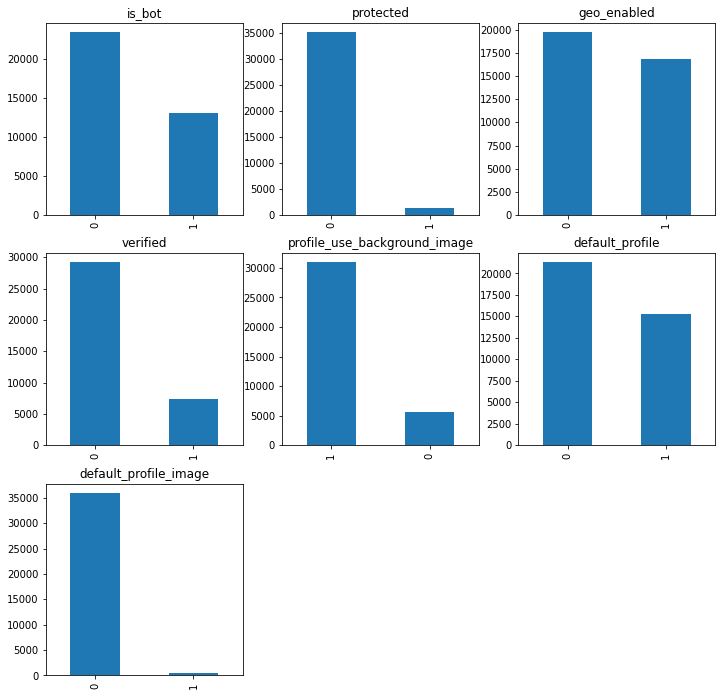

In [10]:
# Set up a grid of plots
fig = plt.figure(figsize=(12,12)) 
fig_dims = (3, 3)


# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
userNum['is_bot'].value_counts().plot(kind='bar', 
                                     title='is_bot')
plt.subplot2grid(fig_dims, (0, 1))
userNum['protected'].value_counts().plot(kind='bar', 
                                     title='protected')
plt.subplot2grid(fig_dims, (0, 2))
userNum['geo_enabled'].value_counts().plot(kind='bar', 
                                     title='geo_enabled')
plt.subplot2grid(fig_dims, (1, 0))
userNum['verified'].value_counts().plot(kind='bar', 
                                     title='verified')
plt.subplot2grid(fig_dims, (1, 1))
userNum['profile_use_background_image'].value_counts().plot(kind='bar', 
                                     title='profile_use_background_image')
plt.subplot2grid(fig_dims, (1, 2))
userNum['default_profile'].value_counts().plot(kind='bar', 
                                     title='default_profile')
plt.subplot2grid(fig_dims, (2, 0))
userNum['default_profile_image'].value_counts().plot(kind='bar', 
                                     title='default_profile_image')

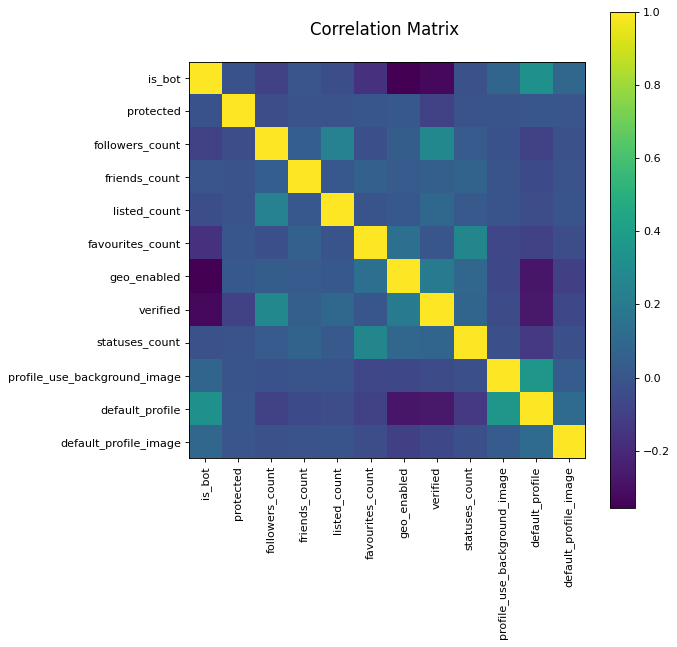

In [11]:
plotCorrelationMatrix(userNum, 8)

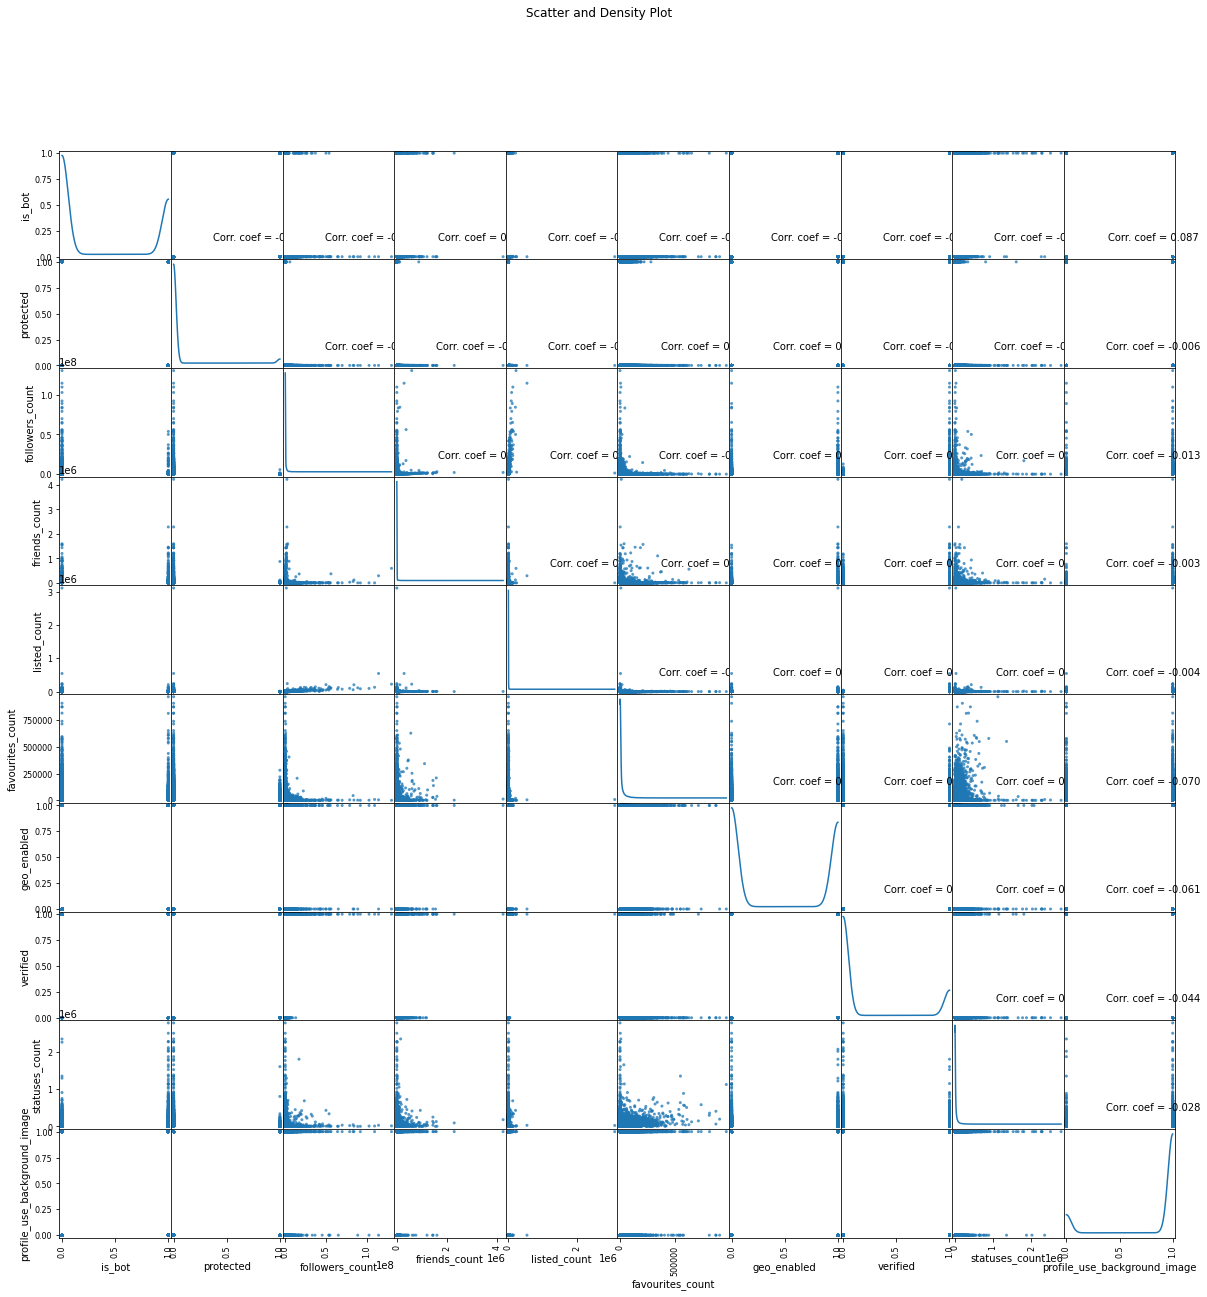

In [12]:
plotScatterMatrix(userNum, 20, 10)

In [13]:
from collections import OrderedDict
import seaborn as sns
def plot_multiple_boxplots(data: pd.DataFrame, grouped_col: str, target_col: str,
                           palette: str = "husl"):
    plt.figure(figsize=(6, 5))

    means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
    counter: int = 0

    bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))
    bp.set(xlabel='', ylabel=f"{target_col.title()}")
    ax = bp.axes

    for k, v in means.items():
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        mean = round(v, 2)
        ax.text(
            counter,
            mean,
            f'{mean}',
            ha='center',
            va='center',
            fontweight='bold',
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
        counter += 1
    bp.figure.tight_layout()
    plt.grid()
    plt.show()

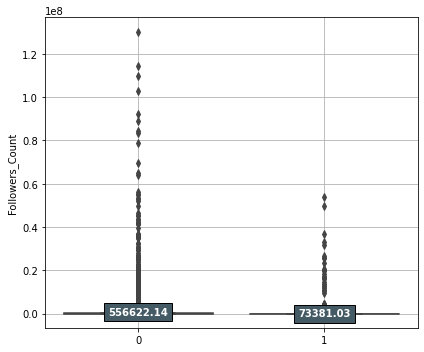

In [14]:
plot_multiple_boxplots(data=userNum,
                       grouped_col='is_bot',
                       target_col='followers_count',
                       palette='husl')

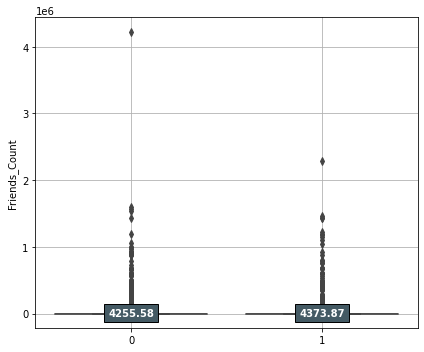

In [15]:
plot_multiple_boxplots(data=userNum,
                       grouped_col='is_bot',
                       target_col='friends_count',
                       palette='husl')

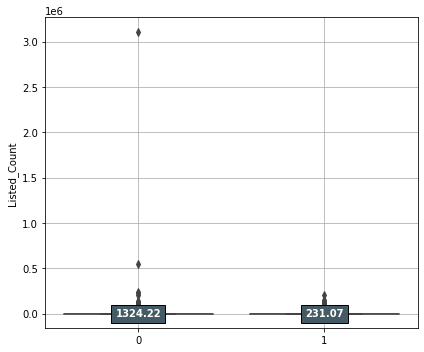

In [16]:
plot_multiple_boxplots(data=userNum,
                       grouped_col='is_bot',
                       target_col='listed_count',
                       palette='husl')

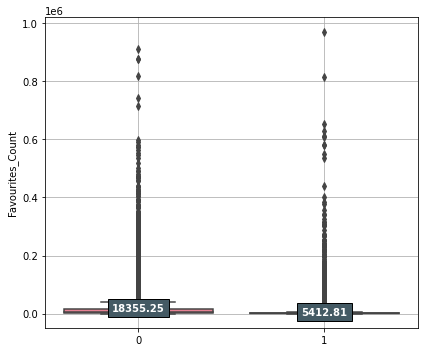

In [17]:
plot_multiple_boxplots(data=userNum,
                       grouped_col='is_bot',
                       target_col='favourites_count',
                       palette='husl')

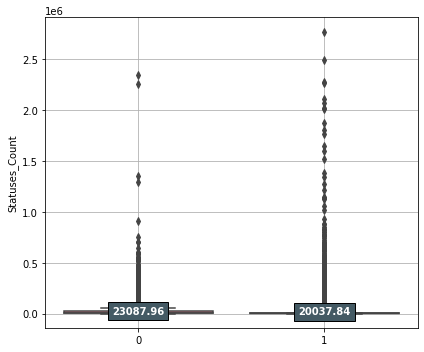

In [18]:
plot_multiple_boxplots(data=userNum,
                       grouped_col='is_bot',
                       target_col='statuses_count',
                       palette='husl')

<Figure size 864x720 with 0 Axes>

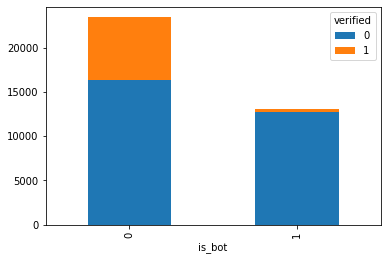

In [19]:
target_col: str = "verified"
plt.figure(figsize=(12, 10))
#twitter_accounts_df2 = twitter_accounts_df
userNum.groupby(['is_bot', target_col])['is_bot'].count().unstack(target_col).plot(kind='bar', stacked=True)

In [20]:
numVerified = 0;
for i in user.index:
  if user["verified"][i] == 1:
    numVerified += 1
print(numVerified)

7419


# Apply Algorithms

In [21]:
userNum.groupby('is_bot').size()

is_bot
0    23492
1    13098
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [23]:
train, test = train_test_split(userNum, test_size = 0.4, stratify = userNum['is_bot'], random_state = 42)
print("set 40% of the data as testing")
#https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b

set 40% of the data as testing


In [24]:
userNum.head()

,is_bot,url,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,profile_use_background_image,default_profile,default_profile_image
0,1,1,0,1698,4,53,4,0,0,13097,0,0,0
1,0,1,0,823,852,5,516,0,0,251,0,0,0
2,1,1,0,193,805,2,4105,1,0,1201,0,0,0
3,1,1,0,569,659,2,10086,1,0,1648,1,1,0
4,0,1,0,748235,118,1818,152,1,1,4292,1,0,0


In [25]:
traning_col = []
for i in userNum.columns:
  if i != 'is_bot': traning_col.append(i)
print(traning_col)


['url', 'protected', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'geo_enabled', 'verified', 'statuses_count', 'profile_use_background_image', 'default_profile', 'default_profile_image']


In [26]:
#create x/y traning/testing set
X_train = train[traning_col]
y_train = train.is_bot
X_test = test[traning_col]
y_test = test.is_bot

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def ShowPerformance(predicted_value, actual_value):
    accuracy = accuracy_score(actual_value , predicted_value) * 100
    precision = precision_score(actual_value , predicted_value) * 100
    recall = recall_score(actual_value , predicted_value) * 100
    f1 = f1_score(actual_value , predicted_value, average='weighted')
    print('Accuracy is {:.4f}%\n Precision is {:.4f}%\n Recall is {:.4f}%\nF1 Score is {:.4f}\n'.format(accuracy, precision, recall, f1))

###Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction=lr.predict(X_test)
ShowPerformance(lr_prediction, y_test)

Accuracy is 65.2022%
 Precision is 56.5647%
 Recall is 12.0061%
F1 Score is 0.5703



###SVM

In [29]:
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)
clf_prediction=clf.predict(X_test)
ShowPerformance(clf_prediction, y_test)

Accuracy is 38.1252%
 Precision is 35.2773%
 Recall is 87.2877%
F1 Score is 0.2967



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###Decision Tree

In [30]:
mod_dt = DecisionTreeClassifier(max_depth = 4, random_state = 1)
mod_dt.fit(X_train,y_train)
mod_dt_prediction=mod_dt.predict(X_test)
#print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(mod_dt_prediction,y_test)))
ShowPerformance(mod_dt_prediction, y_test)

Accuracy is 80.5821%
 Precision is 77.8916%
 Recall is 63.8862%
F1 Score is 0.8009



In [31]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.7429991 , 0.07271357, 0.        ,
       0.05027439, 0.        , 0.04434075, 0.08967219, 0.        ,
       0.        , 0.        ])

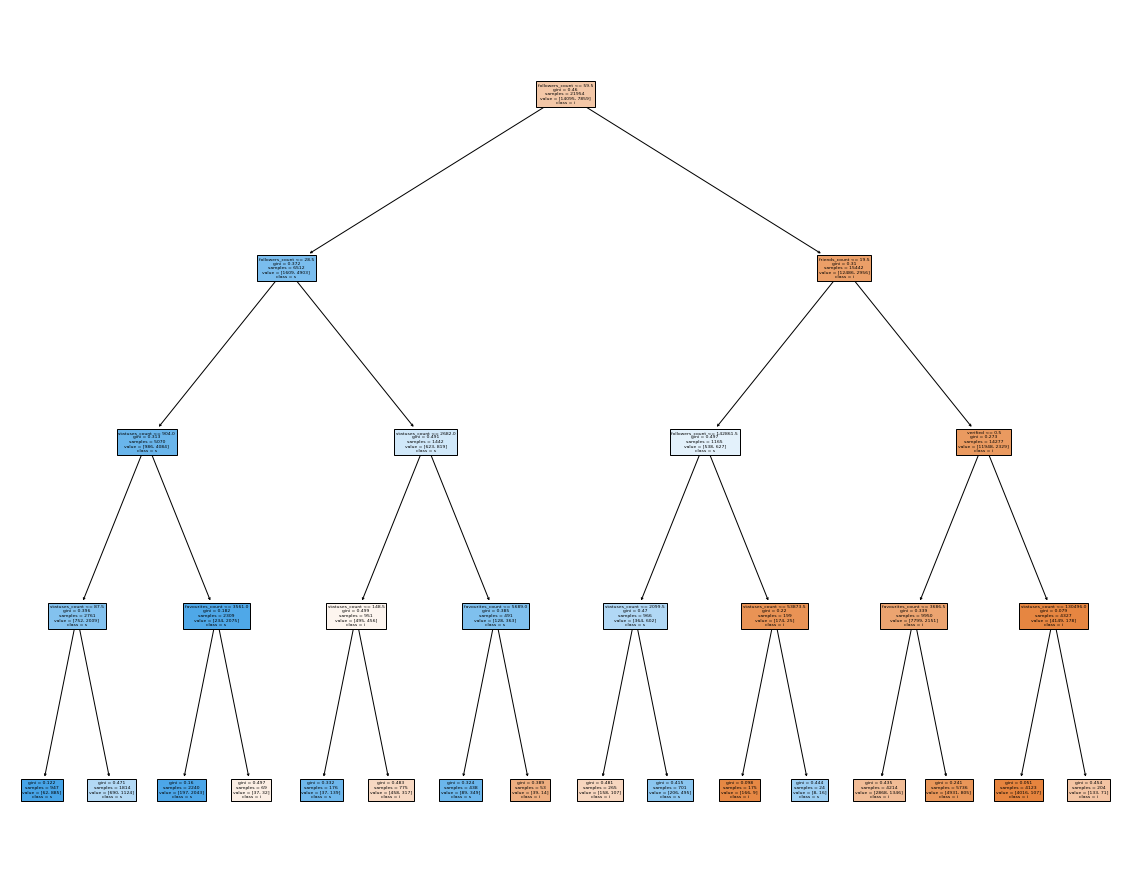

In [32]:
plt.figure(figsize = (20,16))
plot_tree(mod_dt, feature_names = traning_col, class_names = 'is_bot', filled = True);

###Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [34]:
ensemble_search = RandomForestClassifier()
ensemble_search.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
ensemble_search_prediction=ensemble_search.predict(X_test)
#print("The accuracy of the Random Forest is","{:.3f}".format(metrics.accuracy_score(ensemble_search_prediction,y_test)))
ShowPerformance(ensemble_search_prediction, y_test)

Accuracy is 84.9686%
 Precision is 83.0830%
 Recall is 72.8383%
F1 Score is 0.8472



In [36]:
ensemble_search.feature_importances_

array([0.        , 0.00481987, 0.23390913, 0.18181477, 0.10667297,
       0.20441548, 0.03401265, 0.02610454, 0.17748916, 0.00842043,
       0.01869414, 0.00364687])

In [37]:
print(traning_col)

['url', 'protected', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'geo_enabled', 'verified', 'statuses_count', 'profile_use_background_image', 'default_profile', 'default_profile_image']


In [38]:
from sklearn.tree import export_graphviz
RF_estimator = ensemble_search.estimators_[5]

In [39]:
# Export as dot file
export_graphviz(RF_estimator,
                out_file='tree.dot', 
                feature_names = traning_col,
                class_names = 'is_bot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [40]:
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
#from IPython.display import Image
#Image(filename = 'tree.png')

###KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_classify = KNeighborsClassifier(n_neighbors=5)
knn_classify.fit(X_train, y_train)
knn_classify_prediction=knn_classify.predict(X_test)
ShowPerformance(knn_classify_prediction, y_test)

Accuracy is 81.7095%
 Precision is 77.3367%
 Recall is 69.1735%
F1 Score is 0.8146



###Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb_classify= GaussianNB()
nb_classify.fit(X_train, y_train)
nb_classify_prediction=nb_classify.predict(X_test)
ShowPerformance(nb_classify_prediction, y_test)

Accuracy is 46.0645%
 Precision is 39.6861%
 Recall is 97.4995%
F1 Score is 0.3899



##Feature Selection

https://www.kaggle.com/ar2017/basics-of-feature-selection-with-python

###ANOVA F-value

In [43]:
from sklearn.feature_selection import f_classif
f_value = f_classif(X_train, y_train)

# Print the name and F-value of each feature
for feature in zip(traning_col, f_value[0]):
    print(feature)

('url', nan)
('protected', 2.5075034197851265)
('followers_count', 176.38437420146255)
('friends_count', 0.005680073544883777)
('listed_count', 139.93665878181577)
('favourites_count', 578.4297444512031)
('geo_enabled', 3171.285752578914)
('verified', 2743.7953793608494)
('statuses_count', 3.4968994186004245)
('profile_use_background_image', 168.5207663112884)
('default_profile', 2646.0724938048565)
('default_profile_image', 165.57122399341603)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


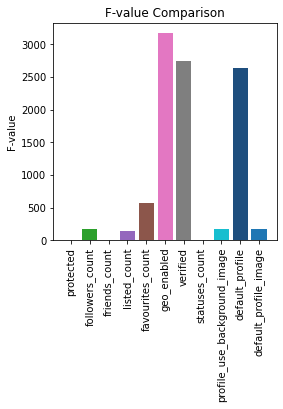

In [68]:
plt.figure(figsize=(4,4))
plt.bar(x=traning_col, height=f_value[0], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1e4e7e'])
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

###Variance Threshold

In [45]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_train)

# Print the name and variance of each feature
for feature in zip(traning_col, selector.variances_):
    print(feature)

('url', 0.0)
('protected', 0.037512344232658076)
('followers_count', 130310481.0)
('friends_count', 4228360.0)
('listed_count', 543765.0)
('favourites_count', 970422.0)
('geo_enabled', 0.24864879964799066)
('verified', 0.16209750070893264)
('statuses_count', 2774232.0)
('profile_use_background_image', 0.131794832361227)
('default_profile', 0.2431651979817274)
('default_profile_image', 0.014053818576277436)


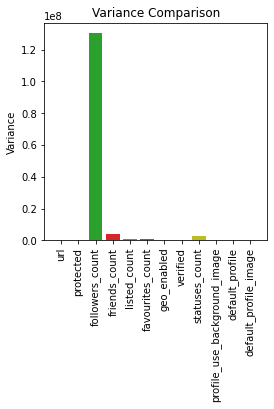

In [70]:
plt.figure(figsize=(4,4))
plt.bar(x=traning_col, height=selector.variances_, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1e4e7e'])
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

###Mutual Information

In [47]:
from sklearn.feature_selection import mutual_info_classif
MI_score = mutual_info_classif(X_train, y_train, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(traning_col, MI_score):
    print(feature)

('url', 0.007430403409058206)
('protected', 0.0002427758913485789)
('followers_count', 0.1791718603039716)
('friends_count', 0.12647425093388676)
('listed_count', 0.11488551032442618)
('favourites_count', 0.10169870741901721)
('geo_enabled', 0.0663432513004627)
('verified', 0.07065654347250039)
('statuses_count', 0.10869214473755218)
('profile_use_background_image', 0.004617741123443375)
('default_profile', 0.052597465864167026)
('default_profile_image', 0.004295781598457227)


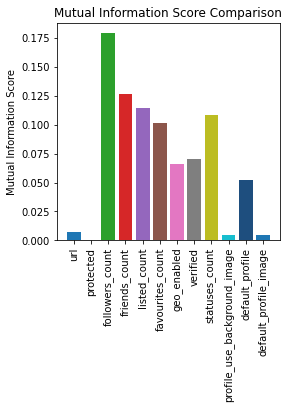

In [71]:
plt.figure(figsize=(4,4))
plt.bar(x=traning_col, height=MI_score, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1e4e7e'])
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

###SelectKBest

In [49]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=5)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_train_new = skb.fit_transform(X_train, y_train)

# Print the results
print('Number of features before feature selection: {}'.format(X_train.shape[1]))
print('Number of features after feature selection: {}'.format(X_train_new.shape[1]))

Number of features before feature selection: 12
Number of features after feature selection: 5


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [50]:
for feature_list_index in skb.get_support(indices=True):
    print('- ' + traning_col[feature_list_index])

- followers_count
- favourites_count
- geo_enabled
- verified
- default_profile


###Sequential Forward Selector

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Create an SFS object
sfs = SFS(estimator=ensemble_search,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Best accuracy score: 0.84
Best subset (indices): (2, 3, 5, 8)
Best subset (corresponding names): ('followers_count', 'friends_count', 'favourites_count', 'statuses_count')


In [52]:
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T 
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(2,)","[0.7406057845593259, 0.7385561375540879, 0.744...",0.743874,"(followers_count,)"
2,"(2, 5)","[0.7895695741289, 0.7950352994762013, 0.785242...",0.791109,"(followers_count, favourites_count)"
3,"(2, 5, 8)","[0.8319289455704851, 0.8301070371213847, 0.831...",0.832605,"(followers_count, favourites_count, statuses_c..."
4,"(2, 3, 5, 8)","[0.8405830107037121, 0.833978592575723, 0.8419...",0.840166,"(followers_count, friends_count, favourites_co..."


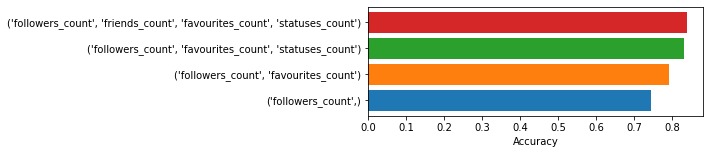

In [72]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, 
        sfs_results['avg_score'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

##Apply PCA

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(userNum.drop(['is_bot'],axis=1))

In [55]:
pca.get_covariance()

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.76561277e-02, -1.44961902e+04,
        -1.11525871e+02, -3.46414243e+01,  4.10961947e+01,
         1.87465785e-03, -7.09935482e-03, -1.63268465e+02,
        -4.55581020e-04,  3.77940836e-04,  4.16330689e-05],
       [ 0.00000000e+00, -1.44961902e+04,  6.43128930e+12,
         6.08442464e+09,  1.07648428e+10, -2.39150911e+09,
         5.40207668e+04,  2.79451913e+05,  5.97957624e+09,
        -1.23834019e+04, -1.12506239e+05, -5.60251408e+03],
       [ 0.00000000e+00, -1.11525871e+02,  6.08442464e+09,
         2.35181454e+09,  1.56339850e+07,  1.13479433e+08,
         7.44503289e+02,  1.06574753e+03,  2.61490537e+08,
        -6.12678901e+01, -1.20676282e+03, -6.19943636e+01],
       [ 0.00000000e+00, -3.46414243e+01,  1.0764842

In [56]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.98596127e-01, 7.97334771e-04, 3.60735155e-04, 2.02770088e-04,
       4.30331857e-05, 5.19129807e-14, 3.02448117e-14, 2.07984459e-14,
       1.47188341e-14, 5.76751813e-15, 2.24493419e-15, 0.00000000e+00])

In [57]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(userNum.drop(['is_bot'],axis=1))

In [58]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, userNum['is_bot'], test_size = 0.3, random_state=20, stratify=userNum['is_bot'])

###KNN with PCA

In [59]:
knn_classify = KNeighborsClassifier(n_neighbors=5)
knn_classify.fit(X_train_new, y_train)
knn_classify_prediction=knn_classify.predict(X_test_new)
ShowPerformance(knn_classify_prediction, y_test)

Accuracy is 82.1445%
 Precision is 77.7402%
 Recall is 70.2214%
F1 Score is 0.8193



###Naive Bayes with PCA

In [60]:
nb_classify= GaussianNB()
nb_classify.fit(X_train_new, y_train)
nb_classify_prediction=nb_classify.predict(X_test_new)
ShowPerformance(nb_classify_prediction, y_test)

Accuracy is 42.6528%
 Precision is 38.3356%
 Recall is 98.9565%
F1 Score is 0.3271



###Decision Tree with PCA

In [61]:
mod_dt = DecisionTreeClassifier(max_depth = 4, random_state = 1)
mod_dt.fit(X_train_new,y_train)
mod_dt_prediction=mod_dt.predict(X_test_new)
#print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(mod_dt_prediction,y_test)))
ShowPerformance(mod_dt_prediction, y_test)

Accuracy is 80.0128%
 Precision is 77.3573%
 Recall is 62.4332%
F1 Score is 0.7946



###Random Forest with PCA

In [62]:
ensemble_search = RandomForestClassifier()
ensemble_search.fit(X_train_new, y_train)
ensemble_search_prediction=ensemble_search.predict(X_test_new)
#print("The accuracy of the Random Forest is","{:.3f}".format(metrics.accuracy_score(ensemble_search_prediction,y_test)))
ShowPerformance(ensemble_search_prediction, y_test)

Accuracy is 83.8480%
 Precision is 82.6271%
 Recall is 69.4833%
F1 Score is 0.8349



###Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_new,y_train)
lr_prediction=lr.predict(X_test_new)
ShowPerformance(lr_prediction, y_test)

Accuracy is 56.3633%
 Precision is 44.8263%
 Recall is 94.9351%
F1 Score is 0.5431



###SVM

In [64]:
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train_new,y_train)
clf_prediction=clf.predict(X_test_new)
ShowPerformance(clf_prediction, y_test)

Accuracy is 47.9913%
 Precision is 40.6316%
 Recall is 98.2438%
F1 Score is 0.4179



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
